Код на Python для загрузки CSV-файла transaction.csv в DataFrame с использованием библиотеки pandas, преобразования колонки tr_date в тип datetime и вывода информации о датасете:

Prompt:

Напиши код на Python для загрузки CSV файла 'transaction.csv' в DataFrame при помощи pandas. Датасет содержит транзакции продаж с колонками: trDte,bcode,clientID,item,itemGroup,quantity,amount. Убедись, что колонка Date преобразована в тип datetime. Выведи первые 5 строк и основную информацию о датасете.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from typing import Literal, Optional

In [3]:
df = pd.read_csv('transaction.csv')

In [4]:
df['trDte'] = pd.to_datetime(df['trDte'], dayfirst=True)

In [5]:
# Вывод первых 5 строк
print("Первые 5 строк:")
print(df.head())

Первые 5 строк:
       trDte          bcode     clientID      item  \
0 2017-09-01  code000000001  client13166   sku8444   
1 2017-09-01  code000000001  client13166  sku12545   
2 2017-09-01  code000000001  client13166   sku3391   
3 2017-09-01  code000000001  client13166  sku20444   
4 2017-09-01  code000000002   client1239  sku29959   

                      itemGroup  quantity  amount  
0              Скобяные изделия         1      29  
1  Оборудование для сада и дачи         1     329  
2                   Инструменты         1     169  
3                   Инструменты         2     578  
4              Скобяные изделия         1     329  


In [6]:
# Вывод основной информации о датасете
print("\nОсновная информация о датасете:")
print(df.info())


Основная информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008688 entries, 0 to 1008687
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   trDte      1008688 non-null  datetime64[ns]
 1   bcode      1008688 non-null  object        
 2   clientID   1008688 non-null  object        
 3   item       1008688 non-null  object        
 4   itemGroup  1008688 non-null  object        
 5   quantity   1008688 non-null  int64         
 6   amount     1008688 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 53.9+ MB
None


In [7]:
# 1. Общая информация
print("1. ОБЩАЯ ИНФОРМАЦИЯ")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print("\nТипы данных:")
print(df.dtypes)

1. ОБЩАЯ ИНФОРМАЦИЯ
Количество строк: 1008688
Количество столбцов: 7

Типы данных:
trDte        datetime64[ns]
bcode                object
clientID             object
item                 object
itemGroup            object
quantity              int64
amount                int64
dtype: object


In [8]:
# 2. Описательная статистика для числовых колонок
print("\n2. ОПИСАТЕЛЬНАЯ СТАТИСТИКА (quantity, amount)")
numeric_cols = ['quantity', 'amount']
print(df[numeric_cols].describe())


2. ОПИСАТЕЛЬНАЯ СТАТИСТИКА (quantity, amount)
           quantity        amount
count  1.008688e+06  1.008688e+06
mean   2.222474e+00  6.231940e+02
std    5.029007e+00  1.878421e+03
min    0.000000e+00  0.000000e+00
25%    1.000000e+00  5.600000e+01
50%    1.000000e+00  1.500000e+02
75%    2.000000e+00  4.250000e+02
max    1.100000e+03  2.131770e+05


In [9]:
# медиана (50%)
print(f"\nМедианы:")
print(df[numeric_cols].median())


Медианы:
quantity      1.0
amount      150.0
dtype: float64


In [10]:
# 3. Проверка пропущенных значений
print("\n3. КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ В КАЖДОМ СТОЛБЦЕ")
print(df.isnull().sum())


3. КОЛИЧЕСТВО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ В КАЖДОМ СТОЛБЦЕ
trDte        0
bcode        0
clientID     0
item         0
itemGroup    0
quantity     0
amount       0
dtype: int64


In [11]:
# 4. Уникальные значения и диапазоны для числовых столбцов
print("\n4. УНИКАЛЬНЫЕ ЗНАЧЕНИЯ И ДИАПАЗОНЫ ДЛЯ ЧИСЛОВЫХ СТОЛБЦОВ")
for col in numeric_cols:
    unique_count = df[col].nunique()
    value_range = (df[col].min(), df[col].max())
    print(f"{col}:")
    print(f"  Уникальных значений: {unique_count}")
    print(f"  Диапазон: от {value_range[0]} до {value_range[1]}")


4. УНИКАЛЬНЫЕ ЗНАЧЕНИЯ И ДИАПАЗОНЫ ДЛЯ ЧИСЛОВЫХ СТОЛБЦОВ
quantity:
  Уникальных значений: 198
  Диапазон: от 0 до 1100
amount:
  Уникальных значений: 11181
  Диапазон: от 0 до 213177


Первое окно: две гистограммы с наложенной KDE-кривой (оценка плотности) — наглядно показывает форму распределения.

Prompt:

Создай графики для анализа распределения quantity и amount из DataFrame df. Используй sns.histplot с kde=True и sns.boxplot. Сделай два окна: одно с гистограммами, второе с box plot.

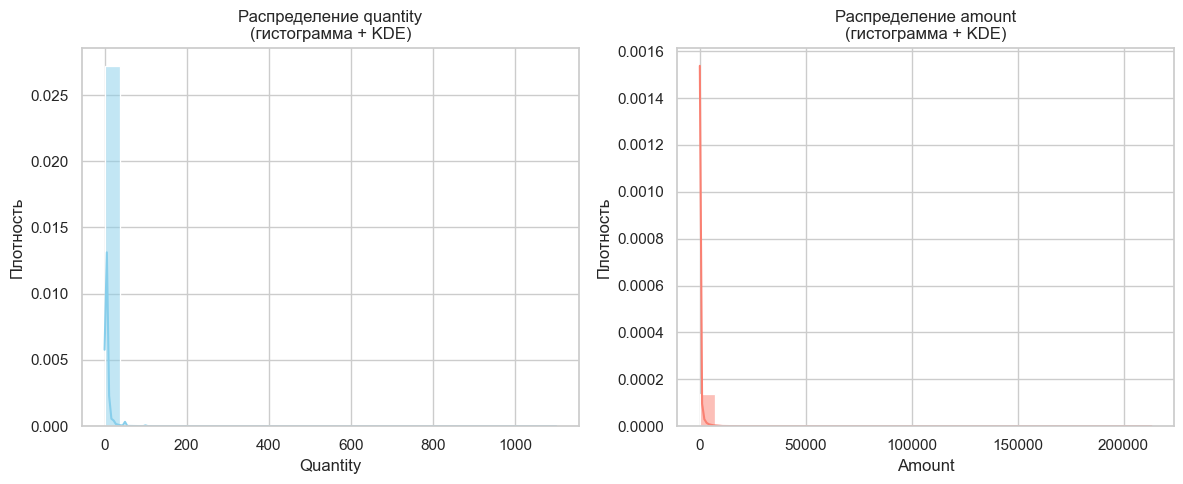

In [12]:
# Настройка стиля графиков
sns.set_theme(style="whitegrid")

# === Окно 1: Гистограммы с KDE ===
plt.figure(figsize=(12, 5))

# Гистограмма для quantity
plt.subplot(1, 2, 1)
sns.histplot(df['quantity'], kde=True, bins=30, color='skyblue', stat="density")
plt.title('Распределение quantity\n(гистограмма + KDE)')
plt.xlabel('Quantity')
plt.ylabel('Плотность')

# Гистограмма для amount
plt.subplot(1, 2, 2)
sns.histplot(df['amount'], kde=True, bins=30, color='salmon', stat="density")
plt.title('Распределение amount\n(гистограмма + KDE)')
plt.xlabel('Amount')
plt.ylabel('Плотность')

# Оформление и отображение первого окна
plt.tight_layout()
plt.show()

Второе окно: box plot для quantity и amount — помогает выявить выбросы и асимметрию.
Используется seaborn.histplot с kde=True.
Для box plot используется melt, чтобы объединить данные в "длинный" формат, удобный для визуализации.

/var/folders/s2/rf8b2cln2wbgjl93s7fwjnp80000gn/T/ipykernel_61336/957950257.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_to_plot, x='variable', y='value', palette='Set2')


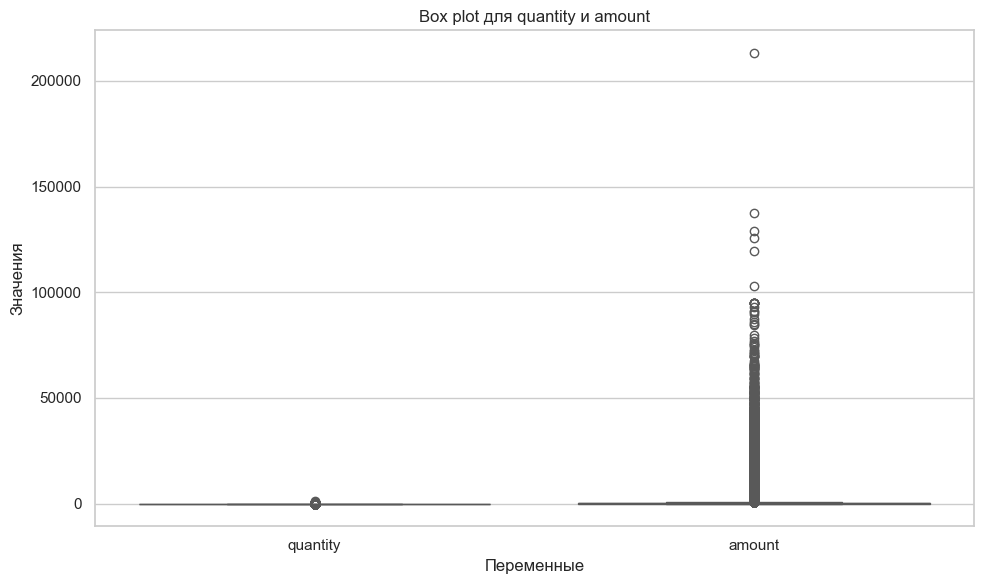

In [13]:
# === Окно 2: Box plot ===
plt.figure(figsize=(10, 6))

# Объединение данных для boxplot
data_to_plot = df[['quantity', 'amount']].melt(value_name='value', var_name='variable')

# Построение box plot
sns.boxplot(data=data_to_plot, x='variable', y='value', palette='Set2')
plt.title('Box plot для quantity и amount')
plt.xlabel('Переменные')
plt.ylabel('Значения')

# Отображение второго окна
plt.tight_layout()
plt.show()

Задача: Найти ТОП-5 товаров по сумме продаж за весь период.

В Loginom это было: Группировка → Сортировка → Фильтр строк.

В Pandas: groupby() → sort_values() → head(n)
Функции: df.groupby, df.agg, df.sort_values, .head

Prompt:

Переделай предыдущий код так, чтобы число ТОП товаров было параметром (переменной N). Создай функцию get_top_products(df, n=5), которая: 1. Принимает DataFrame df и параметр n (количество товаров) 2. Выполняет группировку, сортировку и фильтрацию как в предыдущем примере 3. Возвращает DataFrame с n лучшими товарами Протестируй функцию с разными значениями N.

In [14]:
# Группируем по товару (item), агрегируем: суммируем amount, при необходимости — суммируем quantity
top_5_items = (
    df.groupby('item', as_index=False)
    .agg({'amount': 'sum', 'quantity': 'sum'})  # можно добавить quantity для контекста
    .sort_values(by='amount', ascending=False)
    .head(5)
)

In [15]:
# Вывод результата
print("ТОП-5 товаров по сумме продаж:")
print(top_5_items)

ТОП-5 товаров по сумме продаж:
           item   amount  quantity
17951  sku26161  5373638     18902
9108   sku18199  3951361      7250
13270  sku21947  3918570     15304
20133  sku28128  3027786      7705
28728   sku8342  2113158      3512


In [16]:
def get_top_products(df, n=5):
    """
    Возвращает ТОП-N товаров по сумме продаж (amount).
    
    Параметры:
        df (pd.DataFrame): DataFrame с колонками 'item', 'amount', 'quantity'
        n (int): Количество топовых товаров для возврата (по умолчанию 5)
    
    Возвращает:
        pd.DataFrame: ТОП-N товаров с суммарными amount и quantity, отсортированные по amount
    """
    top_products = (
        df.groupby('item', as_index=False)
        .agg({'amount': 'sum', 'quantity': 'sum'})
        .sort_values(by='amount', ascending=False)
        .head(n)
    )
    return top_products


In [17]:
# === Тестирование функции с разными значениями N ===

print("ТОП-3 товаров:")
print(get_top_products(df, n=3))
print("\n" + "-"*50)

print("ТОП-5 товаров (по умолчанию):")
print(get_top_products(df))
print("\n" + "-"*50)

print("ТОП-10 товаров:")
print(get_top_products(df, n=10))

ТОП-3 товаров:
           item   amount  quantity
17951  sku26161  5373638     18902
9108   sku18199  3951361      7250
13270  sku21947  3918570     15304

--------------------------------------------------
ТОП-5 товаров (по умолчанию):
           item   amount  quantity
17951  sku26161  5373638     18902
9108   sku18199  3951361      7250
13270  sku21947  3918570     15304
20133  sku28128  3027786      7705
28728   sku8342  2113158      3512

--------------------------------------------------
ТОП-10 товаров:
           item   amount  quantity
17951  sku26161  5373638     18902
9108   sku18199  3951361      7250
13270  sku21947  3918570     15304
20133  sku28128  3027786      7705
28728   sku8342  2113158      3512
21796  sku29626  1973964     13669
29479   sku9018  1706341      3299
29981   sku9471  1675843      5045
16744  sku25074  1668585      6125
19760  sku27791  1645042      8384


Задача: Повторить расчет ТОП товаров, но только на данных за последние 6 месяцев (с 31.05.2019 по 31.10.2019).

В Loginom: Фильтр строк с типом условия «последний месяц 6 от даты 31.10.2019»

В Pandas: фильтрация по дате через логические операторы

Prompt:

На основе исходного DataFrame: 1. Задай переменную end_date = '2019-10-31' 2. Задай переменную period_months = 6 3. Рассчитай начальную дату: start_date = end_date - 6 месяцев 4. Отфильтруй DataFrame так, чтобы осталась только дата >= start_date и дата <= end_date 5. На отфильтрованных данных запусти функцию get_top_products(filtered_df, n=5) 6. Вывести результат

In [18]:
# 1. Конечная дата
end_date = pd.Timestamp('2019-10-31')

# 2. Количество месяцев в периоде
period_months = 6

# 3. Начальная дата: отнимаем 6 месяцев
start_date = end_date - pd.DateOffset(months=period_months)

# 4. Фильтрация DataFrame по дате (trDte должен быть в диапазоне)
filtered_df = df[(df['trDte'] >= start_date) & (df['trDte'] <= end_date)]

print(f"Фильтрация по периоду: с {start_date.date()} по {end_date.date()}")
print(f"Количество строк в исходном df: {len(df)}")
print(f"Количество строк в отфильтрованном df: {len(filtered_df)}")

# 5. Применение функции get_top_products к отфильтрованным данным
top_5_recent = get_top_products(filtered_df, n=5)

Фильтрация по периоду: с 2019-04-30 по 2019-10-31
Количество строк в исходном df: 1008688
Количество строк в отфильтрованном df: 350864


In [19]:
# 6. Вывод результата
print(f"\nТОП-5 товаров по сумме продаж в последние {period_months} месяцев:")
print(top_5_recent)


ТОП-5 товаров по сумме продаж в последние 6 месяцев:
           item   amount  quantity
12844  sku26161  2379453      7993
6502   sku18199  1848072      3066
9508   sku21947  1543669      5831
20515   sku8342   970053      1509
9721   sku22208   896275        89


Задача: Понять характеристики клиентов - какую сумму каждый потратил, сколько
покупок сделал, какие объемы покупает.
Это поможет выявить экстремальные значения и «нетипичных» клиентов
(оптовиков).

Функции: groupby, nunique, sum, sort_values

Prompt:

На основе исходного DataFrame выполни анализ по клиентам: 1. Сгруппируй данные по client 2. Для каждого клиента рассчитай: - Общее количество товаров (sum(quantity)) - Общую сумму закупок (sum(amount)) - Количество уникальных дат визитов 3. Отсортируй по сумме закупок в убывающем порядке 4. Сохрани результат в переменную 'client_stats’. После этого выведи статистику по столбцам: - Для quantity: min, max, mean, median - Для amount: min, max, mean, median - Для количества дат визитов: min, max, mean

In [20]:
# Анализ по клиентам

# 1-3. Группировка по клиенту и расчёт метрик
client_stats = (
    df.groupby('clientID')
    .agg(
        total_quantity=('quantity', 'sum'),
        total_amount=('amount', 'sum'),
        unique_visits=('trDte', 'nunique')  # количество уникальных дат покупок
    )
    .sort_values(by='total_amount', ascending=False)
)

In [21]:
# 4. Вывод статистики по метрикам
print("Статистика по клиентам:")
print("\nДля total_quantity (quantity):")
print(f"  min:  {client_stats['total_quantity'].min()}")
print(f"  max:  {client_stats['total_quantity'].max()}")
print(f"  mean: {client_stats['total_quantity'].mean():.2f}")
print(f"  median: {client_stats['total_quantity'].median()}")

Статистика по клиентам:

Для total_quantity (quantity):
  min:  1
  max:  5457
  mean: 52.44
  median: 21.0


In [22]:
print("\nДля total_amount (amount):")
print(f"  min:  {client_stats['total_amount'].min()}")
print(f"  max:  {client_stats['total_amount'].max()}")
print(f"  mean: {client_stats['total_amount'].mean():.2f}")
print(f"  median: {client_stats['total_amount'].median()}")


Для total_amount (amount):
  min:  10
  max:  3887309
  mean: 14705.66
  median: 6410.0


In [23]:
print("\nДля количества дат визитов (unique_visits):")
print(f"  min:  {client_stats['unique_visits'].min()}")
print(f"  max:  {client_stats['unique_visits'].max()}")
print(f"  mean: {client_stats['unique_visits'].mean():.2f}")


Для количества дат визитов (unique_visits):
  min:  1
  max:  174
  mean: 6.18


Задача: Найти клиентов с экстремально большими закупками (более 2,000 единиц товара ИЛИ
более 500,000 руб.).

Такие клиенты могут быть оптовиками или закупками по служебной карте, и они искажают
типичную статистику.

Функции: фильтрация логическим условием, .loc

Prompt:

На основе датафрейма client_stats: 1. Отфильтруй клиентов, у которых: - Количество товаров >= 2000 ИЛИ - Сумма >= 500000 2. Выведи количество найденных клиентов и их список 3. Покажи эти клиентов с их основными характеристиками 4. Опционально: сохрани их ID для дальнейшего анализа в список 'extreme_clients'

In [24]:
# 1. Фильтрация клиентов по условиям: quantity >= 2000 ИЛИ amount >= 500000
filtered_clients = client_stats[
    (client_stats['total_quantity'] >= 2000) | 
    (client_stats['total_amount'] >= 500000)
]

In [25]:
# 2. Вывод количества найденных клиентов
print(f"Количество клиентов, удовлетворяющих условиям: {len(filtered_clients)}")

# 3. Вывод списка клиентов и их характеристик
print("\nКлиенты с высокой активностью:")
print(filtered_clients)

# 4. Опционально: сохранение ID этих клиентов в список
extreme_clients = filtered_clients.index.tolist()

# Дополнительно: вывод ID клиентов
print("\nID этих клиентов:")
print(extreme_clients)

Количество клиентов, удовлетворяющих условиям: 9

Клиенты с высокой активностью:
             total_quantity  total_amount  unique_visits
clientID                                                
client29182            3434       3887309            107
client15654            5457       1443255            174
client8778             1617        986618             17
client1704             1187        636101             23
client33032            1255        537397             74
client37582            2526        502515            159
client30977            2234        407138            121
client34081            2470        386355            157
client20310            3265        366035            102

ID этих клиентов:
['client29182', 'client15654', 'client8778', 'client1704', 'client33032', 'client37582', 'client30977', 'client34081', 'client20310']


Задача: Найти клиентов, которые совершили покупку только один раз. Это помогает понять,
сколько в сети "одноразовых" клиентов, которые не вернулись.

Функции: фильтрация, groupby, nunique

Prompt:

На основе датафрейма client_stats: 1. Отфильтруй клиентов, у которых количество дат визитов == 1 2. Подсчитай количество таких клиентов 3. Выведи статистику по этим клиентам: - Сколько их всего - Какой средний чек у них - Какой средний объем покупок

In [26]:
# 1. Фильтрация клиентов с количеством визитов == 1
one_time_clients = client_stats[client_stats['unique_visits'] == 1]

# 2. Подсчёт количества таких клиентов
num_one_time_clients = len(one_time_clients)
print(f"Количество клиентов с одним визитом: {num_one_time_clients}")


Количество клиентов с одним визитом: 12859


In [27]:
# 3. Статистика по новым клиентам
if num_one_time_clients > 0:
    avg_amount = one_time_clients['total_amount'].mean()
    avg_quantity = one_time_clients['total_quantity'].mean()
    
    print("\nСтатистика по клиентам с одним визитом:")
    print(f"  Средний чек (средняя сумма покупки): {avg_amount:.2f}")
    print(f"  Средний объем покупок (среднее количество товара): {avg_quantity:.2f}")
else:
    print("Клиентов с одним визитом не найдено.")


Статистика по клиентам с одним визитом:
  Средний чек (средняя сумма покупки): 3535.45
  Средний объем покупок (среднее количество товара): 8.67


Задача: Рассчитать цену одной единицы товара в каждой транзакции (amount / quantity).

Это производный показатель, который рассчитывается на основе существующих столбцов.

В Loginom: компонент Калькулятор.

В Pandas: создание нового столбца через операции с существующими столбцами

Функции: Новый столбец, арифметика

Prompt:

На основе исходного DataFrame: 1. Перед расчетом убедись, что нет строк с quantity = 0 (это может привести к делению на 0) - Подсчитай количество таких строк - Если есть, выведи их и удали из DataFrame 2. Создай новый столбец 'price' = amount / quantity 3. Выведи статистику по новому столбцу price: - min, max, mean, median 4. Выведи первые 10 строк исходного DataFrame + новый столбец price

In [28]:
print("Столбцы в DataFrame:")
print(df.columns.tolist())

Столбцы в DataFrame:
['trDte', 'bcode', 'clientID', 'item', 'itemGroup', 'quantity', 'amount']


In [29]:
# 1. Проверка строк с quantity = 0
df = df.copy()

# Подсчёт строк, где quantity = 0
zero_quantity_mask = df['quantity'] == 0
num_zero_quantity = zero_quantity_mask.sum()

print(f"Количество строк с quantity = 0: {num_zero_quantity}")

if num_zero_quantity > 0:
    print("Примеры строк с quantity = 0:")
    print(df[zero_quantity_mask])
    
    # Удаление строк с quantity = 0
    df = df[~zero_quantity_mask].copy()
    print(f"Строки с quantity = 0 удалены. Текущее количество строк: {len(df)}")
else:
    print("Строки с quantity = 0 не обнаружены.")

# 2. Создание нового столбца 'price' = amount / quantity
df['price'] = df['amount'] / df['quantity']

Количество строк с quantity = 0: 1
Примеры строк с quantity = 0:
            trDte          bcode     clientID      item         itemGroup  \
920771 2019-09-14  code000261741  client24307  sku26360  Скобяные изделия   

        quantity  amount  
920771         0       1  
Строки с quantity = 0 удалены. Текущее количество строк: 1008687


In [30]:
# 3. Статистика по столбцу 'price'
print("\nСтатистика по столбцу 'price':")
print(f"  min:    {df['price'].min():.2f}")
print(f"  max:    {df['price'].max():.2f}")
print(f"  mean:   {df['price'].mean():.2f}")
print(f"  median: {df['price'].median():.2f}")


Статистика по столбцу 'price':
  min:    0.00
  max:    119500.00
  mean:   389.78
  median: 102.89


In [31]:
# 4. Вывод первых 10 строк с новым столбцом
print("\nПервые 10 строк с новым столбцом 'price':")
print(df.head(10))


Первые 10 строк с новым столбцом 'price':
       trDte          bcode     clientID      item  \
0 2017-09-01  code000000001  client13166   sku8444   
1 2017-09-01  code000000001  client13166  sku12545   
2 2017-09-01  code000000001  client13166   sku3391   
3 2017-09-01  code000000001  client13166  sku20444   
4 2017-09-01  code000000002   client1239  sku29959   
5 2017-09-01  code000000002   client1239  sku19394   
6 2017-09-01  code000000002   client1239   sku9916   
7 2017-09-01  code000000002   client1239  sku27003   
8 2017-09-01  code000000002   client1239  sku15395   
9 2017-09-01  code000000002   client1239  sku25185   

                      itemGroup  quantity  amount  price  
0              Скобяные изделия         1      29   29.0  
1  Оборудование для сада и дачи         1     329  329.0  
2                   Инструменты         1     169  169.0  
3                   Инструменты         2     578  289.0  
4              Скобяные изделия         1     329  329.0  
5       

Задача: Посмотреть на распределение цен, чтобы понять, есть ли выбросы и как распределены
данные.

Визуализация (гистограмма, диаграмма размаха) помогает выявить проблемы в данных.

Prompt:

На основе DataFrame с рассчитанной ценой товара: 1. Выведи описательную статистику столбца 'price': - Квартили (25%, 50%, 75%) - Минимум и максимум - Межквартильный диапазон (IQR = Q3 - Q1) 2. Рассчитай границы для потенциальных выбросов: - lower_bound = Q1 - 1.5 * IQR - upper_bound = Q3 + 1.5 * IQR 3. Подсчитай количество выбросов (цены за пределами этих границ) 4. Выведи примеры выбросов (10 самых дорогих и 10 самых дешевых товаров) и создай визуализацию гистограммы и box plot

In [32]:
# 1. Описательная статистика по 'price'
Q1 = df['price'].quantile(0.25)
Q2 = df['price'].median()  # 50%
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

min_price = df['price'].min()
max_price = df['price'].max()

In [33]:
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО 'price':")
print(f"Минимум:     {min_price:.2f}")
print(f"25% (Q1):     {Q1:.2f}")
print(f"50% (Q2/медиана): {Q2:.2f}")
print(f"75% (Q3):     {Q3:.2f}")
print(f"Максимум:    {max_price:.2f}")
print(f"Межквартильный размах (IQR): {IQR:.2f}")

ОПИСАТЕЛЬНАЯ СТАТИСТИКА ПО 'price':
Минимум:     0.00
25% (Q1):     39.00
50% (Q2/медиана): 102.89
75% (Q3):     269.00
Максимум:    119500.00
Межквартильный размах (IQR): 230.00


In [34]:
# 2. Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [35]:
print(f"\nГраницы выбросов:")
print(f"Нижняя граница (Q1 - 1.5*IQR): {lower_bound:.2f}")
print(f"Верхняя граница (Q3 + 1.5*IQR): {upper_bound:.2f}")


Границы выбросов:
Нижняя граница (Q1 - 1.5*IQR): -306.00
Верхняя граница (Q3 + 1.5*IQR): 614.00


In [36]:
# 3. Подсчёт выбросов
outliers_low = df[df['price'] < lower_bound]
outliers_high = df[df['price'] > upper_bound]
outliers = pd.concat([outliers_low, outliers_high])

In [37]:
print(f"\nКоличество выбросов: {len(outliers)}")
print(f"  из них слишком низкие цены: {len(outliers_low)}")
print(f"  слишком высокие цены: {len(outliers_high)}")


Количество выбросов: 112596
  из них слишком низкие цены: 0
  слишком высокие цены: 112596


In [38]:
# 4. Примеры выбросов
print(f"\n10 самых дешёвых выбросов:")
print(outliers_low[['item', 'price', 'quantity', 'amount']].sort_values(by='price').head(10))

print(f"\n10 самых дорогих выбросов:")
print(outliers_high[['item', 'price', 'quantity', 'amount']].sort_values(by='price', ascending=False).head(10))


10 самых дешёвых выбросов:
Empty DataFrame
Columns: [item, price, quantity, amount]
Index: []

10 самых дорогих выбросов:
            item     price  quantity  amount
734936   sku8449  119500.0         1  119500
242769   sku6834   76990.0         1   76990
153014  sku27261   74990.0         1   74990
847552   sku6834   74990.0         1   74990
713368   sku5775   71991.0         1   71991
766446   sku6834   71241.0         1   71241
704822   sku6834   71241.0         1   71241
624879  sku29862   69990.0         1   69990
222969  sku12045   69990.0         1   69990
648925   sku6834   69741.0         1   69741


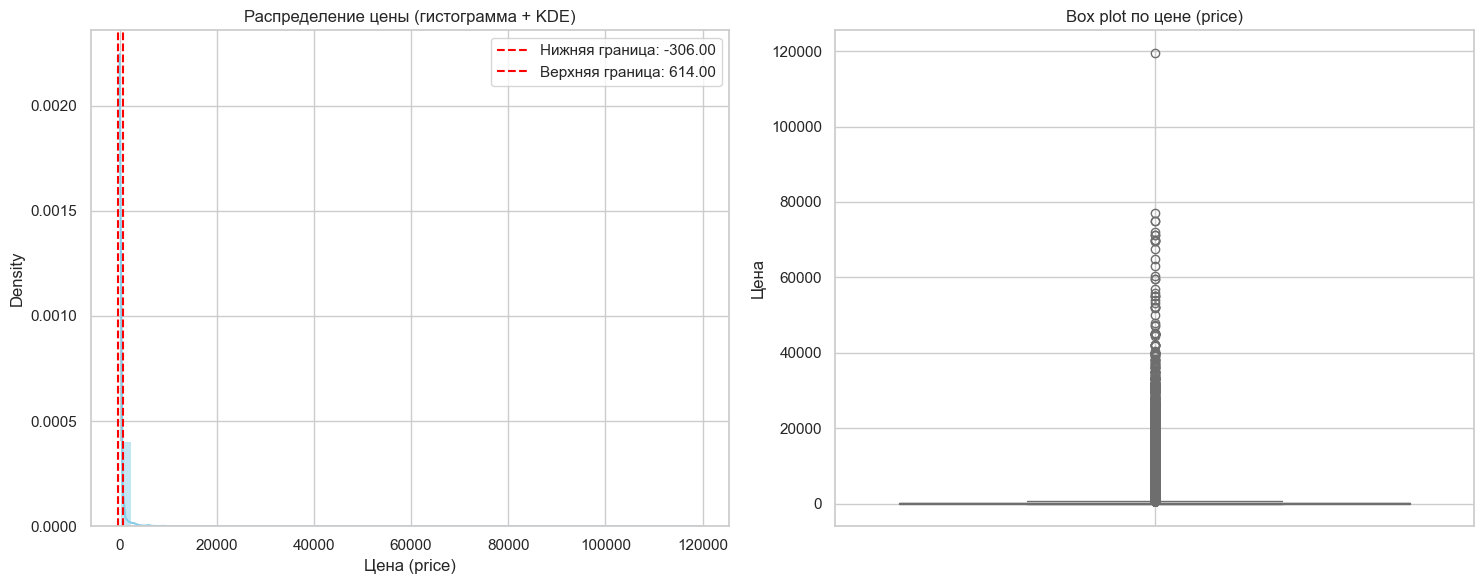

In [39]:
# 5. Визуализация: гистограмма и boxplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма с KDE
sns.histplot(df['price'], kde=True, bins=50, ax=axes[0], color='skyblue', stat="density")
axes[0].axvline(lower_bound, color='red', linestyle='--', label=f'Нижняя граница: {lower_bound:.2f}')
axes[0].axvline(upper_bound, color='red', linestyle='--', label=f'Верхняя граница: {upper_bound:.2f}')
axes[0].set_title('Распределение цены (гистограмма + KDE)')
axes[0].set_xlabel('Цена (price)')
axes[0].legend()
axes[0].grid(True)

# Boxplot
sns.boxplot(y=df['price'], ax=axes[1], color='lightcoral')
axes[1].set_title('Box plot по цене (price)')
axes[1].set_ylabel('Цена')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Задача: Выполнить АВС-анализ товаров по сумме продаж. АВС-анализ делит товары на три группы:

▪ Группа А (80% выручки) - ключевые товары для бизнеса

▪ Группа В (15% выручки) - средней важности

▪ Группа С (5% выручки) - малозначимые

Функции: groupby, сортировка, расчет накопительного процента

Prompt:

Выполни АВС-анализ товаров по сумме продаж: 1. Сгруппируй данные по item и рассчитай сумму продаж каждого товара 2. Отсортируй товары по сумме продаж в убывающем порядке 3. Рассчитай накопительный процент (cumulative %) для каждого товара: - Общая сумма всех продаж = total_sum - Для каждого товара: cumulative_sum / total_sum * 100 4. На основе накопительного процента распредели товары на группы: - Группа A: cumulative % <= 80% - Группа B: cumulative % > 80% and <= 95% - Группа C: cumulative % > 95% 5. Выведи количество товаров в каждой группе и примеры товаров из каждой группы

In [40]:
# Выполняем АВС-анализ по сумме продаж (amount) для товаров (item)

# 1. Группируем по товару и считаем сумму продаж
sales_by_item = df.groupby('item', as_index=False)['amount'].sum()

# 2. Сортируем по убыванию суммы продаж
sales_by_item = sales_by_item.sort_values(by='amount', ascending=False).reset_index(drop=True)

# 3. Рассчитываем накопительный процент
total_sum = sales_by_item['amount'].sum()
sales_by_item['cumulative_sum'] = sales_by_item['amount'].cumsum()
sales_by_item['cumulative_percent'] = (sales_by_item['cumulative_sum'] / total_sum) * 100

# 4. Присваиваем группы A, B, C
def assign_abc_group(cum_percent):
    if cum_percent <= 80:
        return 'A'
    elif cum_percent <= 95:
        return 'B'
    else:
        return 'C'

sales_by_item['ABC_group'] = sales_by_item['cumulative_percent'].apply(assign_abc_group)

In [41]:

# 5. Выводим количество товаров в каждой группе и примеры
print("Количество товаров в каждой группе:")
group_counts = sales_by_item['ABC_group'].value_counts().sort_index()
print(group_counts)

Количество товаров в каждой группе:
ABC_group
A     5353
B     8234
C    16979
Name: count, dtype: int64


In [42]:
print("\nПримеры товаров из группы A (ТОП по продажам):")
print(sales_by_item[sales_by_item['ABC_group'] == 'A'][['item', 'amount', 'cumulative_percent']].head(5))



Примеры товаров из группы A (ТОП по продажам):
       item   amount  cumulative_percent
0  sku26161  5373638            0.854847
1  sku18199  3951361            1.483435
2  sku21947  3918570            2.106808
3  sku28128  3027786            2.588473
4   sku8342  2113158            2.924637


In [43]:
print("\nПримеры товаров из группы B:")
print(sales_by_item[sales_by_item['ABC_group'] == 'B'][['item', 'amount', 'cumulative_percent']].head(5))



Примеры товаров из группы B:
          item  amount  cumulative_percent
5353  sku10822   22836           80.001791
5354  sku10724   22834           80.005424
5355  sku29015   22826           80.009055
5356  sku26094   22824           80.012686
5357  sku19581   22817           80.016316


In [44]:
print("\nПримеры товаров из группы C (низкие продажи):")
print(sales_by_item[sales_by_item['ABC_group'] == 'C'][['item', 'amount', 'cumulative_percent']].head(5))



Примеры товаров из группы C (низкие продажи):
           item  amount  cumulative_percent
13587  sku13438    5357           95.000265
13588    sku872    5357           95.001117
13589  sku18189    5357           95.001969
13590  sku21154    5355           95.002821
13591   sku5421    5355           95.003673


Задача: Выполнить XYZ-анализ товаров по стабильности продаж (на основе количества товаров).
XYZ-анализ показывает стабильность спроса:

▪ Группа X (стабильный спрос) - коэффициент вариации < 15%

▪ Группа Y (колеблющийся спрос) - коэффициент вариации 15-25%

▪ Группа Z (нестабильный спрос) - коэффициент вариации > 25%

Функции: groupby, расчет std, коэффициент вариации

Prompt:

Дополни XYZ-анализ товаров (по количеству): Используй для расчета коэффициент вариации = std / mean * 100. На основе коэффициента вариации распредели товары: - Группа X: CV < 15% - Группа Y: 15% <= CV <= 25% - Группа Z: CV > 25%. Выведи количество товаров в каждой группе и итоговый датафрейм.

In [45]:
# Выполняем XYZ-анализ по стабильности продаж (по количеству — quantity)

# 1. Группируем по товару и рассчитываем среднее и стандартное отклонение
xyz_data = df.groupby('item')['quantity'].agg(['mean', 'std']).reset_index()

# 2. Рассчитываем коэффициент вариации (CV) = std / mean * 100
# Используем .fillna(np.inf), чтобы обработать случаи mean == 0
xyz_data['cv'] = (xyz_data['std'] / xyz_data['mean']) * 100
xyz_data['cv'] = xyz_data['cv'].replace([np.inf, -np.inf], np.nan)  # заменяем бесконечности на NaN

# 3. Удаляем строки с NaN (если mean == 0 или std == NaN)
xyz_data.dropna(subset=['cv'], inplace=True)

# 4. Присваиваем XYZ-группы на основе CV
def assign_xyz_group(cv):
    if cv < 15:
        return 'X'
    elif 15 <= cv <= 25:
        return 'Y'
    else:
        return 'Z'

xyz_data['XYZ_group'] = xyz_data['cv'].apply(assign_xyz_group)

In [46]:
# 5. Выводим количество товаров в каждой группе
print("Количество товаров в каждой XYZ-группе:")
group_counts_xyz = xyz_data['XYZ_group'].value_counts().sort_index()
print(group_counts_xyz)

Количество товаров в каждой XYZ-группе:
XYZ_group
X     8028
Y     1354
Z    17557
Name: count, dtype: int64


In [47]:
# Вывод итогового датафрейма (можно объединить с ABC-анализом позже)
print("\nИтоговый датафрейм XYZ-анализа:")
print(xyz_data.head(10))  # Пример первых 10 строк


Итоговый датафрейм XYZ-анализа:
       item      mean       std          cv XYZ_group
0      sku1  1.375000  0.517549   37.639940         Z
1     sku10  2.000000  1.224745   61.237244         Z
2    sku100  1.396552  0.883465   63.260430         Z
3   sku1000  1.268293  0.667569   52.635279         Z
4  sku10000  2.483871  2.908275  117.086403         Z
5  sku10001  2.000000  2.408319  120.415946         Z
6  sku10002  1.000000  0.000000    0.000000         X
7  sku10003  1.000000  0.000000    0.000000         X
8  sku10004  4.333333  6.218253  143.498139         Z
9  sku10005  1.000000  0.000000    0.000000         X


Матрица ABC-XYZ - это анализ товаров, который соединяет:

▪ ABC-анализ (важность товара по выручке: группы A, B, C)

▪ XYZ-анализ (стабильность спроса: группы X, Y, Z)

Результат: матрица 3x3 с 9 комбинациями (AX, AY, AZ, BX, BY, BZ, CX, CY, CZ), каждой из которых рекомендуется своя стратегия управления.

Prompt:

Создай перекрестную таблицу (pivot table) АВС группа x XYZ группа для матрицы ABC-XYZ

In [48]:
# Объединяем результаты ABC-анализа и XYZ-анализа в один DataFrame

# Предварительно: убедимся, что в обоих датафреймах столбец 'item' — это обычный столбец, а не индекс
# ABC-анализ: sales_by_item (из предыдущего шага)
# XYZ-анализ: xyz_data (из предыдущего шага)

# Оставляем только нужные столбцы
abc_xyz_combined = pd.merge(
    sales_by_item[['item', 'ABC_group']],
    xyz_data[['item', 'XYZ_group']],
    on='item',
    how='inner'  # берем только товары, присутствующие в обоих анализах
)

# Создаём сводную таблицу (pivot table) — количество товаров в каждой комбинации
pivot_abc_xyz = pd.crosstab(
    abc_xyz_combined['ABC_group'],
    abc_xyz_combined['XYZ_group']
)

# Добавим названия осей для ясности
pivot_abc_xyz.index.name = 'ABC группа'
pivot_abc_xyz.columns.name = 'XYZ группа'

In [49]:
# Вывод перекрёстной таблицы
print("Перекрёстная таблица ABC × XYZ (количество товаров):")
print(pivot_abc_xyz)

Перекрёстная таблица ABC × XYZ (количество товаров):
XYZ группа     X    Y     Z
ABC группа                 
A           1471  297  3529
B           2050  411  5261
C           4507  646  8767


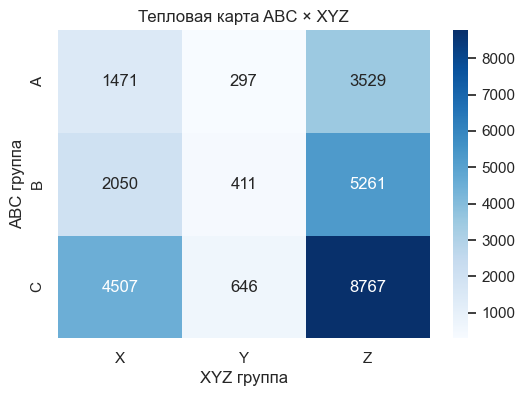

In [50]:
# Визуализация в виде тепловой карты
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_abc_xyz, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Тепловая карта ABC × XYZ")
plt.show()

Задача: Повторить АВС-XYZ анализ, но только на данных за последние 6 месяцев.
Это показывает, как изменился портрет товаров в последнее время.

Prompt:

1. Создай функцию abc_xyz_analysis(df, abc_threshold_a=80, abc_threshold_b=95): a) Которая выполняет весь АВС-XYZ анализ из предыдущих инструкций b) Параметры позволяют менять границы групп А и В 2. Отфильтруй исходный DataFrame за последние 6 месяцев (с 01.05.2019 по 31.10.2019) 2. 3апусти функцию на отфильтрованных данных: abc_xyz_analysis(df_last_6m) 3. Сравни результаты за весь период и за последние 6 месяцев: a) Сколько товаров перешло из группы в группу? b) Какие товары стали важнее? c) Какие - менее важны? Используй только товары, которые есть в обоих периодах

In [51]:
# Типы групп
ABCGROUP = Literal['A', 'B', 'C']
XYZGROUP = Literal['X', 'Y', 'Z']

In [52]:
def validate_input_df(df: pd.DataFrame) -> None:
    """Проверяет наличие нужных колонок и не пустой ли DataFrame."""
    if df.empty:
        raise ValueError("DataFrame is empty.")
    
    required = {'item', 'quantity', 'amount'}
    missing = required - set(df.columns)
    if missing:
        raise KeyError(f"Missing required columns: {missing}")


In [53]:
def validate_abc_thresholds(a: float, b: float) -> None:
    """Проверяет корректность порогов ABC-анализа."""
    if not (0 < a < b < 100):
        raise ValueError(f"ABC thresholds must satisfy: 0 < {a} < {b} < 100")

In [54]:
def calculate_abc_groups(
    df: pd.DataFrame,
    threshold_a: float = 80.0,
    threshold_b: float = 95.0
) -> pd.DataFrame:
    """
    Рассчитывает ABC-группы по сумме продаж (amount).
    
    Возвращает: DataFrame с колонками ['item', 'ABC_group']
    """
    # Агрегация
    abc_raw = df.groupby('item', as_index=False)['amount'].sum()
    abc_raw = abc_raw.sort_values(by='amount', ascending=False).reset_index(drop=True)
    
    # Проверка на нулевые продажи
    total = abc_raw['amount'].sum()
    if total == 0:
        abc_raw['ABC_group'] = 'C'
    else:
        abc_raw['cumulative_percent'] = (abc_raw['amount'].cumsum() / total) * 100
        abc_raw['ABC_group'] = pd.cut(
            abc_raw['cumulative_percent'],
            bins=[0, threshold_a, threshold_b, 100],
            labels=['A', 'B', 'C'],
            include_lowest=True,
            right=False
        )
    
    return abc_raw[['item', 'ABC_group']]

In [55]:
def calculate_xyz_groups(
    df: pd.DataFrame,
    cv_x: float = 15.0,
    cv_y: float = 25.0
) -> pd.DataFrame:
    """
    Рассчитывает XYZ-группы по коэффициенту вариации спроса (quantity).
    
    Возвращает: DataFrame с колонками ['item', 'XYZ_group']
    """
    # Группировка
    xyz_raw = df.groupby('item')['quantity'].agg(['mean', 'std']).reset_index()
    
    # Фильтрация
    xyz_raw = xyz_raw.dropna()
    xyz_raw = xyz_raw[xyz_raw['mean'] > 0]
    
    # Коэффициент вариации
    xyz_raw['cv'] = (xyz_raw['std'] / xyz_raw['mean']) * 100
    xyz_raw['cv'] = xyz_raw['cv'].replace([np.inf, -np.inf], np.nan)
    xyz_raw = xyz_raw.dropna(subset=['cv'])
    
    # Назначение групп
    xyz_raw['XYZ_group'] = pd.cut(
        xyz_raw['cv'],
        bins=[0, cv_x, cv_y, float('inf')],
        labels=['X', 'Y', 'Z'],
        right=False
    )
    
    return xyz_raw[['item', 'XYZ_group']]

In [56]:
def merge_abc_xyz(
    abc: pd.DataFrame,
    xyz: pd.DataFrame
) -> pd.DataFrame:
    """
    Объединяет результаты ABC и XYZ-анализа по 'item'.
    
    Возвращает: DataFrame с колонками ['item', 'ABC_group', 'XYZ_group']
    """
    result = pd.merge(abc, xyz, on='item', how='inner')
    
    if result.empty:
        raise ValueError("No items matched both ABC and XYZ criteria. Check data.")
    
    return result

In [57]:
def abc_xyz_analysis(
    df: pd.DataFrame,
    abc_threshold_a: float = 80.0,
    abc_threshold_b: float = 95.0
) -> pd.DataFrame:
    """
    Основная функция: выполняет ABC-XYZ анализ, разбитый на шаги.
    """
    # Валидация
    validate_input_df(df)
    validate_abc_thresholds(abc_threshold_a, abc_threshold_b)
    
    # Шаг 1: ABC
    abc_result = calculate_abc_groups(df, abc_threshold_a, abc_threshold_b)
    
    # Шаг 2: XYZ
    xyz_result = calculate_xyz_groups(df)
    
    # Шаг 3: Объединение
    return merge_abc_xyz(abc_result, xyz_result)

In [58]:
# 2. Фильтрация данных за последние 6 месяцев (май – октябрь 2019)
# Предполагаем, что df уже загружен и 'trDte' — в формате datetime

start_date = '2019-05-01'
end_date = '2019-10-31'

df_last_6m = df[(df['trDte'] >= start_date) & (df['trDte'] <= end_date)].copy()

In [59]:
# Проверка
print(f"Количество строк за весь период: {len(df)}")
print(f"Количество строк за последние 6 месяцев: {len(df_last_6m)}")

Количество строк за весь период: 1008687
Количество строк за последние 6 месяцев: 347736


In [60]:
# 3. Запуск анализа для двух периодов
print("\nВыполняется ABC-XYZ анализ за весь период...")
full_period = abc_xyz_analysis(df)

print("Выполняется ABC-XYZ анализ за последние 6 месяцев...")
recent_period = abc_xyz_analysis(df_last_6m)


Выполняется ABC-XYZ анализ за весь период...
Выполняется ABC-XYZ анализ за последние 6 месяцев...


In [61]:
# --- Сравнение результатов ---

# Оставим только товары, присутствующие в обоих периодах
common_items = pd.merge(
    full_period,
    recent_period,
    on='item',
    suffixes=('_full', '_recent'),
    how='inner'
)

In [62]:
# a) Сколько товаров перешло из группы в группу?
print("\n" + "="*60)
print("СРАВНЕНИЕ ABC-ГРУПП ЗА ДВА ПЕРИОДА")
print("="*60)

changed_abc = common_items[common_items['ABC_group_full'] != common_items['ABC_group_recent']]
print(f"Количество товаров, изменивших ABC-группу: {len(changed_abc)}")
print("\nПримеры товаров, изменивших ABC-группу:")
print(changed_abc[['item', 'ABC_group_full', 'ABC_group_recent']].head(10))



СРАВНЕНИЕ ABC-ГРУПП ЗА ДВА ПЕРИОДА
Количество товаров, изменивших ABC-группу: 3444

Примеры товаров, изменивших ABC-группу:
         item ABC_group_full ABC_group_recent
126   sku8752              A                B
233   sku9350              A                C
247  sku27764              A                B
341   sku6611              A                C
446  sku15020              A                B
469  sku26165              A                B
485   sku6659              A                B
487  sku25811              A                B
528  sku26946              A                B
529  sku13552              A                B


In [63]:
# b) Какие товары стали важнее (например, из B → A или C → B/A)?
improved = changed_abc[
    ((changed_abc['ABC_group_full'] == 'B') & (changed_abc['ABC_group_recent'] == 'A')) |
    ((changed_abc['ABC_group_full'] == 'C') & (changed_abc['ABC_group_recent'].isin(['A', 'B'])))
]
print(f"\nТовары, ставшие важнее (улучшили ABC-группу): {len(improved)}")
if len(improved) > 0:
    print(improved[['item', 'ABC_group_full', 'ABC_group_recent']].head())


Товары, ставшие важнее (улучшили ABC-группу): 1137
          item ABC_group_full ABC_group_recent
4193  sku10822              B                A
4194  sku10724              B                A
4202   sku6205              B                A
4203   sku8514              B                A
4206  sku25184              B                A


In [64]:
# c) Какие стали менее важны (например, A → B/C)?
declined = changed_abc[
    ((changed_abc['ABC_group_full'] == 'A') & (changed_abc['ABC_group_recent'].isin(['B', 'C']))) |
    ((changed_abc['ABC_group_full'] == 'B') & (changed_abc['ABC_group_recent'] == 'C'))
]
print(f"\nТовары, ставшие менее важны: {len(declined)}")
if len(declined) > 0:
    print(declined[['item', 'ABC_group_full', 'ABC_group_recent']].head())


Товары, ставшие менее важны: 2307
         item ABC_group_full ABC_group_recent
126   sku8752              A                B
233   sku9350              A                C
247  sku27764              A                B
341   sku6611              A                C
446  sku15020              A                B


In [65]:
# Опционально: свод по изменениям
print("\nРаспределение изменений ABC-групп:")
print(changed_abc.groupby(['ABC_group_full', 'ABC_group_recent']).size().unstack(fill_value=0))


Распределение изменений ABC-групп:
ABC_group_recent    A    B     C
ABC_group_full                  
A                   0  865    81
B                 458    0  1361
C                   0  679     0


/var/folders/s2/rf8b2cln2wbgjl93s7fwjnp80000gn/T/ipykernel_61336/553905875.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(changed_abc.groupby(['ABC_group_full', 'ABC_group_recent']).size().unstack(fill_value=0))


Задача: Сохранить все промежуточные результаты в CSV файлы для дальнейшего использования.

Prompts:

Сохрани результаты анализа в CSV файлы: 1. Результаты ТОП-5 товаров → 'top_5_products.csv' 2. 2. Статистику по клиентам → 'client_statistics.csv’ 3. АВС-анализ товаров → 'abc_analysis.csv’ 4. XYZ-анализ товаров → 'xyz_analysis.csv’ 5. Матрицу ABC-XYZ → 'abc_xyz_matrix.csv’ 6. Данные за последние 6 месяцев → 'last_6_months_data.csv’. Используй method='w', index=False для сохранения без индекса Проверь, что файлы успешно созданы, выведи первые 5 строк каждого файла

Создай еще подпапку results и туда все csv сохраняй

In [66]:
# Создаём подпапку 'results', если её нет
results_dir = 'results'
os.makedirs(results_dir, exist_ok=True)
print(f"Папка '{results_dir}' готова к сохранению файлов.")

Папка 'results' готова к сохранению файлов.


In [67]:
# Пути к файлам будут в формате: results/filename.csv

# 1. ТОП-5 товаров
top_5_products = get_top_products(df, n=5)
top_5_products.to_csv(f'{results_dir}/top_5_products.csv', index=False)
print("✅ 'top_5_products.csv' сохранён")

✅ 'top_5_products.csv' сохранён


In [68]:
# 2. Статистика по клиентам
client_stats.to_csv(f'{results_dir}/client_statistics.csv', index=False)
print("✅ 'client_statistics.csv' сохранён")

✅ 'client_statistics.csv' сохранён


In [69]:
# 3. ABC-анализ
abc_data = pd.DataFrame({
    'item': sales_by_item['item'],
    'total_amount': sales_by_item['amount'],
    'cumulative_percent': sales_by_item['cumulative_percent'],
    'ABC_group': sales_by_item['ABC_group']
})
abc_data.to_csv(f'{results_dir}/abc_analysis.csv', index=False)
print("✅ 'abc_analysis.csv' сохранён")

✅ 'abc_analysis.csv' сохранён


In [70]:
# 4. XYZ-анализ
xyz_data.to_csv(f'{results_dir}/xyz_analysis.csv', index=False)
print("✅ 'xyz_analysis.csv' сохранён")

✅ 'xyz_analysis.csv' сохранён


In [71]:
# 5. Матрица ABC-XYZ (объединённая таблица по товарам)
abc_xyz_combined.to_csv(f'{results_dir}/abc_xyz_matrix.csv', index=False)
print("✅ 'abc_xyz_matrix.csv' сохранён")

✅ 'abc_xyz_matrix.csv' сохранён


In [72]:
# 6. Данные за последние 6 месяцев
df_last_6m.to_csv(f'{results_dir}/last_6_months_data.csv', index=False)
print("✅ 'last_6_months_data.csv' сохранён")

✅ 'last_6_months_data.csv' сохранён


In [73]:
# Вывод первых 5 строк каждого файла для проверки
print("\n" + "="*60)
print("ПРОВЕРКА СОДЕРЖИМОГО ФАЙЛОВ (первые 5 строк)")
print("="*60)

for filename in [
    'top_5_products.csv',
    'client_statistics.csv',
    'abc_analysis.csv',
    'xyz_analysis.csv',
    'abc_xyz_matrix.csv',
    'last_6_months_data.csv'
]:
    path = f'{results_dir}/{filename}'
    if os.path.exists(path):
        print(f"\n📄 {filename}:")
        print(pd.read_csv(path).head())
    else:
        print(f"\n❌ Файл {filename} не найден!")


ПРОВЕРКА СОДЕРЖИМОГО ФАЙЛОВ (первые 5 строк)

📄 top_5_products.csv:
       item   amount  quantity
0  sku26161  5373638     18902
1  sku18199  3951361      7250
2  sku21947  3918570     15304
3  sku28128  3027786      7705
4   sku8342  2113158      3512

📄 client_statistics.csv:
   total_quantity  total_amount  unique_visits
0            3434       3887309            107
1            5457       1443255            174
2            1617        986618             17
3            1187        636101             23
4            1255        537397             74

📄 abc_analysis.csv:
       item  total_amount  cumulative_percent ABC_group
0  sku26161       5373638            0.854847         A
1  sku18199       3951361            1.483435         A
2  sku21947       3918570            2.106808         A
3  sku28128       3027786            2.588473         A
4   sku8342       2113158            2.924637         A

📄 xyz_analysis.csv:
       item      mean       std          cv XYZ_group
0    

In [74]:
# Финальная проверка
print(f"\n✅ Все файлы успешно сохранены в папку: '{results_dir}/'")


✅ Все файлы успешно сохранены в папку: 'results/'
